<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/Copie_de_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime,date,timedelta
import datetime as dt
from wordcloud import WordCloud # Visualisation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv('/content/drive/MyDrive/MACHINE_LEARNING/QueryResultsP5.csv', sep=',')
df.head()

,LastActivityDate,Title,Tags,Score
0,2022-08-29 20:14:36,Determine the type of an object?,<python><dictionary><types><typeof>,2164
1,2022-07-02 05:29:08,Why can't Python parse this JSON data?,<python><json><parsing>,1503
2,2023-11-20 22:23:13,Best way to convert string to bytes in Python 3?,<python><string><character-encoding><python-3.x>,1482
3,2022-11-09 15:44:56,Display number with leading zeros,<python><integer><string-formatting>,1419
4,2023-07-28 17:04:02,Create a Pandas Dataframe by appending one row...,<python><pandas><dataframe><append>,1399


Exploratory Data Analysis

In [3]:
print(df.shape)

(50, 4)


In [4]:
df.isnull().sum()

LastActivityDate    0
Title               0
Tags                0
Score               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

LastActivityDate    object
Title               object
Tags                object
Score                int64
dtype: object

In [22]:
df['Title'].nunique()

50

In [23]:
df['Tags'].nunique()

47

In [38]:
df['Score'].nunique()

48

In [8]:
#Résumé stat
df.describe(include="all").round(2)

,LastActivityDate,Title,Tags,Score
count,50,50,50,50.00
unique,50,50,47,NaN
top,2022-08-29 20:14:36,Determine the type of an object?,<python>,NaN
freq,1,1,3,NaN
mean,NaN,NaN,NaN,563.28
std,NaN,NaN,NaN,406.65
min,NaN,NaN,NaN,259.00
25%,NaN,NaN,NaN,321.50
50%,NaN,NaN,NaN,406.50
75%,NaN,NaN,NaN,607.00


In [9]:
df.columns

Index(['LastActivityDate', 'Title', 'Tags', 'Score'], dtype='object')

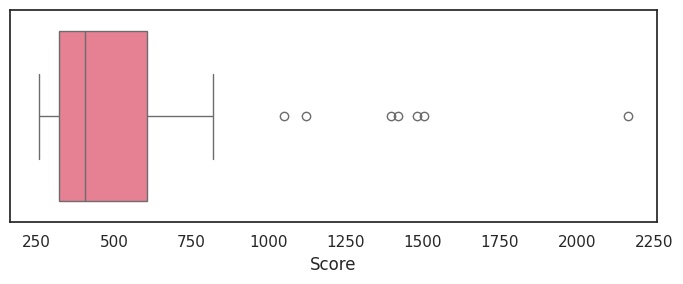

In [10]:
#Visualisation des outliers
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='Score')

#Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

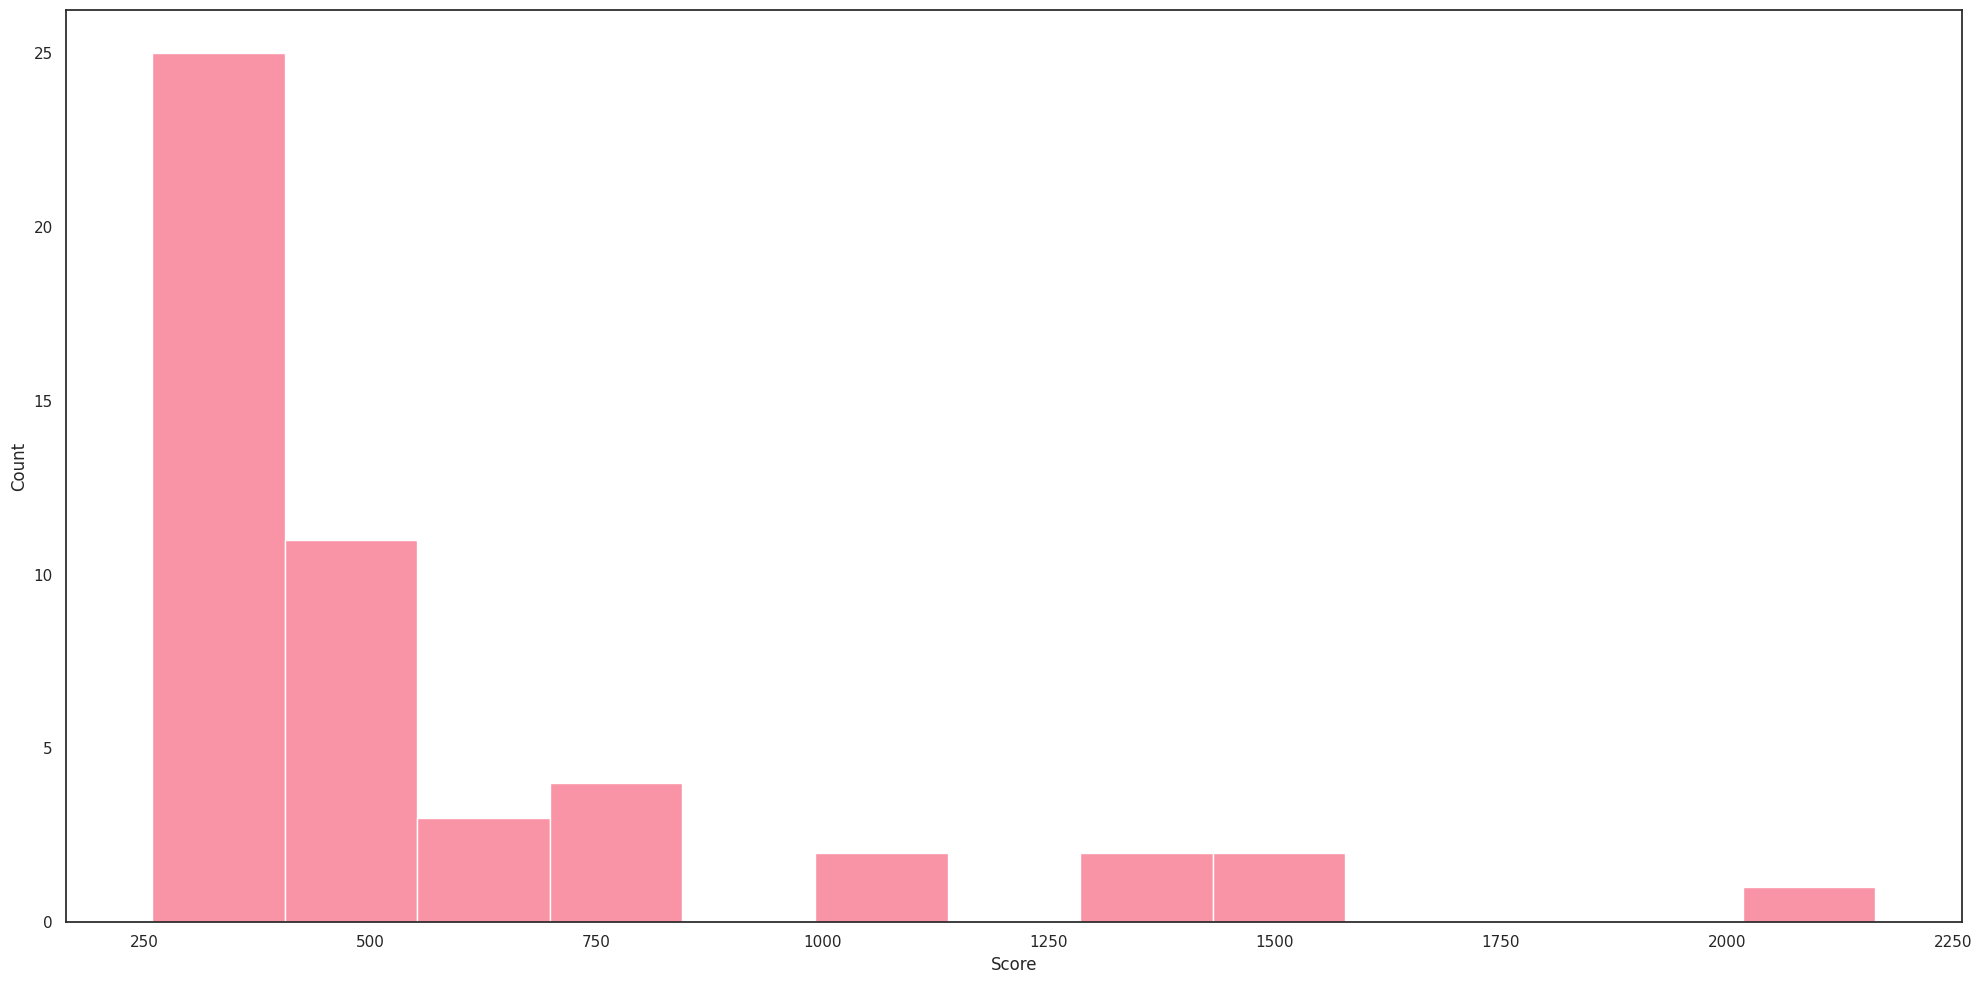

In [11]:
# Visualisation des histogrammes de la variable Score
plt.figure(figsize=(20, 10))
sns.set(style="white", palette="husl")
sns.histplot(data=df, x='Score')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("hist.png")

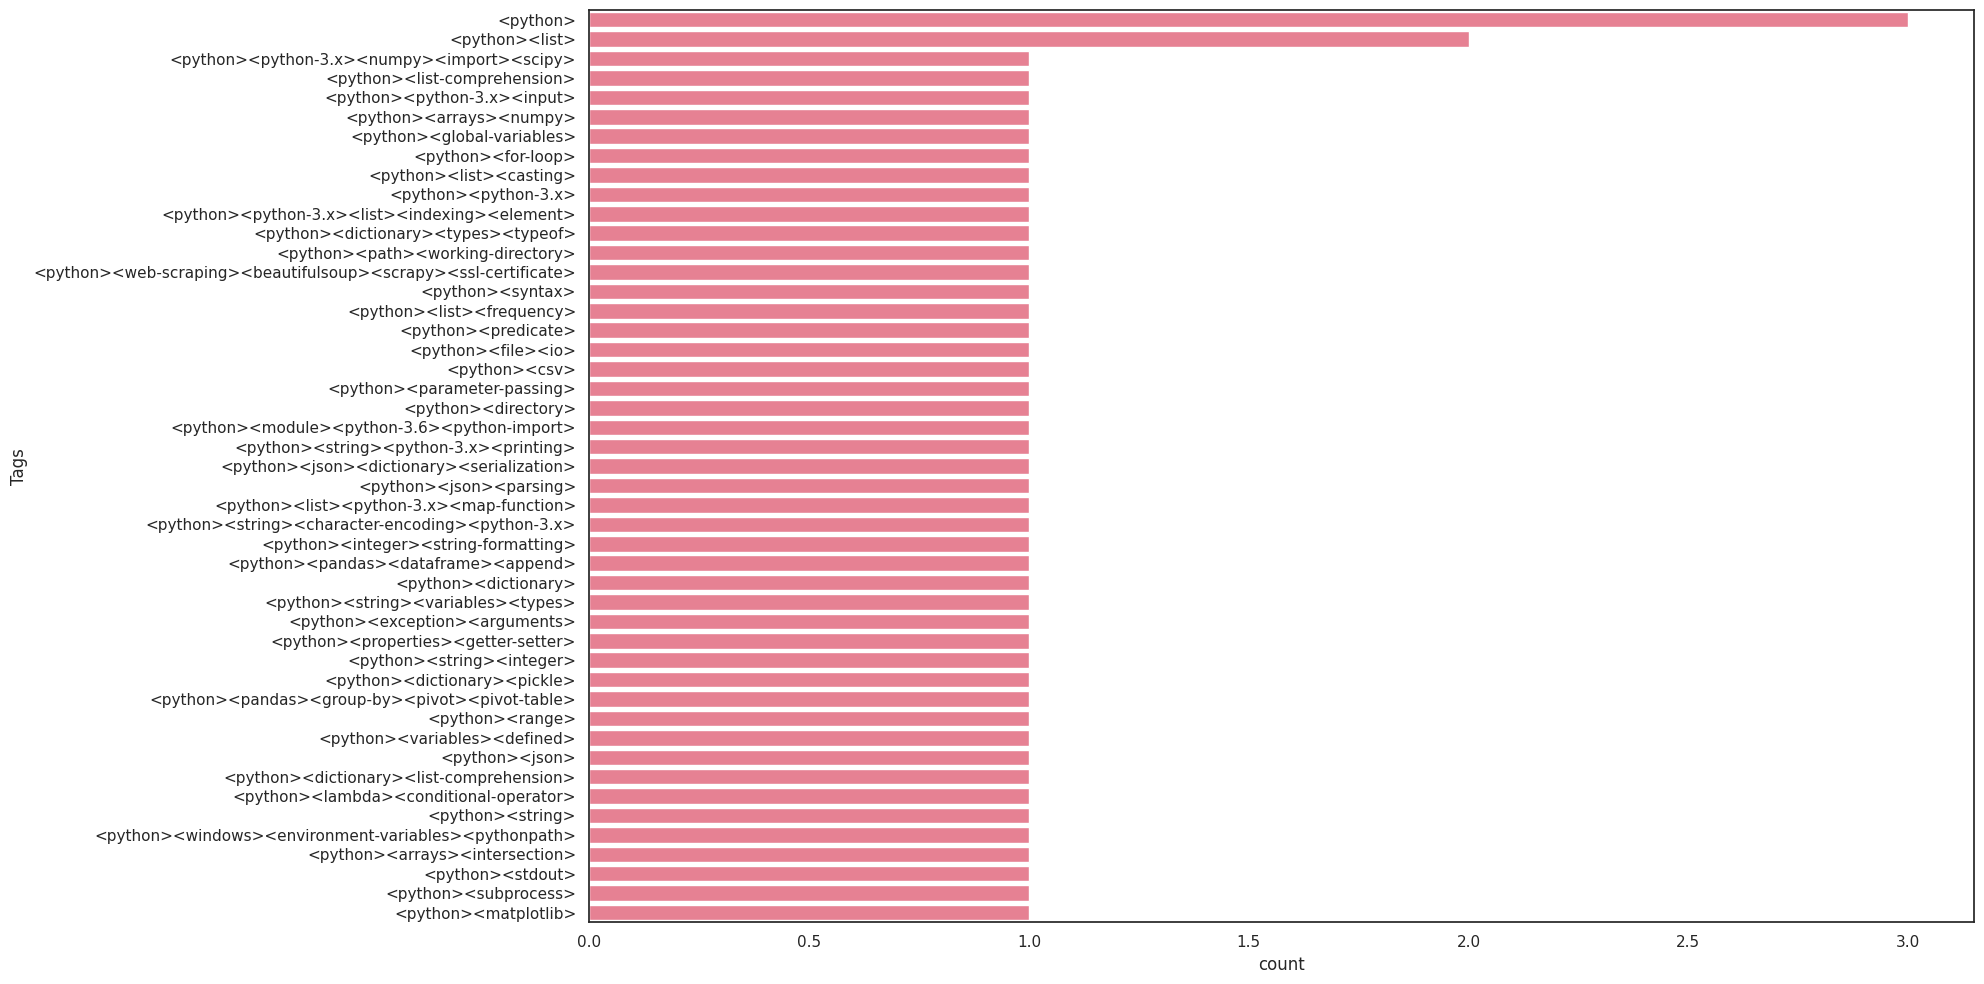

In [18]:
# Visualisation des histogrammes de la variable tags
plt.figure(figsize=(20, 10))
sns.set(style="white", palette="husl")
sns.countplot(data=df, y='Tags', order=df['Tags'].value_counts(ascending=False).index)

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("tags.png")

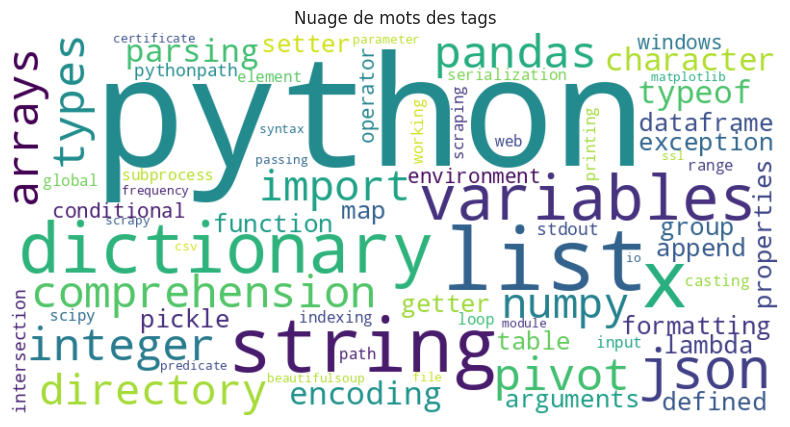

In [25]:
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Tags'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()

In [37]:
for index, vect in df.iterrows():
  print(vect['Title'])

Determine the type of an object?
Why can't Python parse this JSON data?
Best way to convert string to bytes in Python 3?
Display number with leading zeros
Create a Pandas Dataframe by appending one row at a time
Should I use 'has_key()' or 'in' on Python dicts?
How to check if type of a variable is string?
Which exception should I raise on bad/illegal argument combinations in Python?
Using @property versus getters and setters
How can I check if a string represents an int, without using try/except?
How can I use pickle to save a dict (or any other Python object)?
Getting a map() to return a list in Python 3.x
How can I pivot a dataframe?
Determine if variable is defined in Python
Reading JSON from a file
Python Dictionary Comprehension
Is there a way to perform "if" in python's lambda?
Convert a list of characters into a string
How to add to the PYTHONPATH in Windows, so it finds my modules/packages?
How to find list intersection?
Redirect stdout to a file in Python?
Store output of sub

In [39]:
for index, vect in df.iterrows():
  print(vect['Tags'])

<python><dictionary><types><typeof>
<python><json><parsing>
<python><string><character-encoding><python-3.x>
<python><integer><string-formatting>
<python><pandas><dataframe><append>
<python><dictionary>
<python><string><variables><types>
<python><exception><arguments>
<python><properties><getter-setter>
<python><string><integer>
<python><dictionary><pickle>
<python><list><python-3.x><map-function>
<python><pandas><group-by><pivot><pivot-table>
<python><variables><defined>
<python><json>
<python><dictionary><list-comprehension>
<python><lambda><conditional-operator>
<python><string>
<python><windows><environment-variables><pythonpath>
<python><arrays><intersection>
<python><stdout>
<python><subprocess>
<python><range>
<python><json><dictionary><serialization>
<python><path><working-directory>
<python>
<python><list-comprehension>
<python><python-3.x><input>
<python><arrays><numpy>
<python><global-variables>
<python><for-loop>
<python><list><casting>
<python><python-3.x>
<python><python-

Analyse textuelle


In [41]:
# 1 titre = 1 document
doc = df.Title.sample(1)
doc

11    Getting a map() to return a list in Python 3.x
Name: Title, dtype: object

In [44]:
doc = doc.values[0]

Lower

In [45]:
# Met tout en minuscule
doc.lower()

'getting a map() to return a list in python 3.x'

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [46]:
tokens = word_tokenize(doc)
tokens

['Getting',
 'a',
 'map',
 '(',
 ')',
 'to',
 'return',
 'a',
 'list',
 'in',
 'Python',
 '3.x']

In [50]:
len(tokens)

12

In [49]:
# Crée un ensemble (collection non ordonnée d'éléments uniques) à partir de tokens
# <=> Nombre d'éléments uniques dans la liste tokens (il y a 2 'a' dans tokens)
len(set(tokens))

11

In [53]:
tokens = wordpunct_tokenize(doc)

['Getting',
 'a',
 'map',
 '()',
 'to',
 'return',
 'a',
 'list',
 'in',
 'Python',
 '3',
 '.',
 'x']

In [54]:
len(tokens)

12

In [64]:
def display_tokens_info(tokens):
  print("Nb tokens : ", len(tokens), " --  Nb tokens uniques : ", len(set(tokens)))
  print(tokens)

In [65]:
display_tokens_info(tokens)

Nb tokens :  12  --  Nb tokens uniques :  11
['Getting', 'a', 'map', '(', ')', 'to', 'return', 'a', 'list', 'in', 'Python', '3.x']


Stopwords

In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'herself', 'he', 'should', 'how', "aren't", 'couldn', 'ain', "needn't", 'theirs', 'only', 're', "shan't", 'him', 'until', 'shouldn', 'but', 'below', 'm', 'we', 'whom', "hadn't", "she's", 'out', 'few', 'here', 'do', "you've", 'down', 'yours', 'own', 'will', 'to', 'be', 'most', 'and', "don't", 'there', 'off', 'now', 'an', "wouldn't", 'don', 'doing', 'its', "hasn't", "mustn't", 've', 'having', 'were', 's', 'aren', 'once', 'no', 'you', 'into', 'your', 'for', 'some', 'it', "didn't", "wasn't", 'if', 'y', 'been', 'd', 'being', "shouldn't", 'are', 'o', 'where', 'what', "you'd", 'll', 'during', "weren't", 'as', 'again', "haven't", 'she', 'them', "doesn't", 'up', 'has', 'shan', 't', 'from', 'weren', 'why', 'with', 'yourselves', 'about', 'the', 'ours', 'over', 'than', 'other', 'who', 'they', 'or', 'on', 'my', 'nor', 'after', "isn't", 'those', 'each', 'hadn', "you'll", "that'll", "couldn't", 'their', 'under', 'hasn', 'which', 'needn', 'haven', 'in', 'itself', 'both', 'mustn', 'just', 'any', 'is',

In [72]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

Nb tokens :  8  --  Nb tokens uniques :  8
['Getting', 'map', '(', ')', 'return', 'list', 'Python', '3.x']


In [73]:
# Un autre tokenizer
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

Nb tokens :  11  --  Nb tokens uniques :  10
['Getting', 'a', 'map', 'to', 'return', 'a', 'list', 'in', 'Python', '3', 'x']


In [74]:
# Supprimer les stopwords
tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

Nb tokens :  7  --  Nb tokens uniques :  7
['Getting', 'map', 'return', 'list', 'Python', '3', 'x']
